In [1]:
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
from math import pi,sin,cos,acos,asin
import numpy as np
import seaborn as sns
from scipy.stats import linregress
import math
from ml_metrics import rmse,mae
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import minimize
from matplotlib.ticker import PercentFormatter
from scipy.optimize import fsolve
import matplotlib.ticker as ticker

In [2]:
def cosd(b):
    return cos(math.radians(b))
def sind(a):
    return sin(math.radians(a))
def tand(f):
    return tan(math.radians(f))
def acosd(d):
    return math.degrees(acos(d))
def asind(c):
    return math.degrees(asin(c))

In [3]:
df=pd.read_csv('DynamicLineRating_2019_2.csv')
df['UT_Time']= df.JulianTime.apply(lambda x: datetime.strptime(x,'%m/%d/%Y %H:%M'))
df['LocalTime'] = df['UT_Time'] + timedelta(hours = 7)

In [4]:
def day(LocalTime):
    return float(datetime.strftime(LocalTime,'%d'))
df['Day'] = df.LocalTime.apply(lambda x:(day(x)))
def hour(LocalTime):
    return float(datetime.strftime(LocalTime,'%H'))
df['Hour'] = df.LocalTime.apply(lambda x:(hour(x)))
def month(LocalTime):
    #local_Time = UT_Time + timedelta(hours = 7)
    return float(datetime.strftime(LocalTime,'%m'))
df['Month'] = df.LocalTime.apply(lambda x:(month(x)))

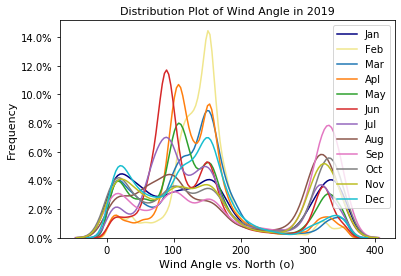

In [5]:
sns.distplot(np.array(df.WindDir_Wvane1_deg_avg360[(df['Month']==1)]),color='navy',label='Jan',bins=50, hist=False)
sns.distplot(np.array(df.WindDir_Wvane1_deg_avg360[(df['Month']==2)]),color='khaki',label='Feb',bins=50, hist=False)
sns.distplot(np.array(df.WindDir_Wvane1_deg_avg360[(df['Month']==3)]),label='Mar',bins=50, hist=False)
sns.distplot(np.array(df.WindDir_Wvane1_deg_avg360[(df['Month']==4)]),label='Apl',bins=50, hist=False)
sns.distplot(np.array(df.WindDir_Wvane1_deg_avg360[(df['Month']==5)]),label='May',bins=50, hist=False)
sns.distplot(np.array(df.WindDir_Wvane1_deg_avg360[(df['Month']==6)]),label='Jun',bins=50, hist=False)
sns.distplot(np.array(df.WindDir_Wvane1_deg_avg360[(df['Month']==7)]),label='Jul',bins=50, hist=False)
sns.distplot(np.array(df.WindDir_Wvane1_deg_avg360[(df['Month']==8)]),label='Aug',bins=50, hist=False)
sns.distplot(np.array(df.WindDir_Wvane1_deg_avg360[(df['Month']==9)]),label='Sep',bins=50, hist=False)
sns.distplot(np.array(df.WindDir_Wvane1_deg_avg360[(df['Month']==10)]),label='Oct',bins=50, hist=False)
sns.distplot(np.array(df.WindDir_Wvane1_deg_avg360[(df['Month']==11)]),label='Nov',bins=50, hist=False)
sns.distplot(np.array(df.WindDir_Wvane1_deg_avg360[(df['Month']==12)]),label='Dec',bins=50, hist=False)
#fig, ax = plt.subplots()
#ax.hist(amp_plot,bins=50,edgecolor='black')
#plt.axvline(x=940, color='red',linewidth=2,label='SLR: 940 A')
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Wind Angle vs. North (o)',fontsize=11)
plt.ylabel('Frequency',fontsize=11)
#plt.legend()
plt.title('Distribution Plot of Wind Angle in 2019',fontsize=11)
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=0.1))
#plt.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(amp_plot)))
plt.show()

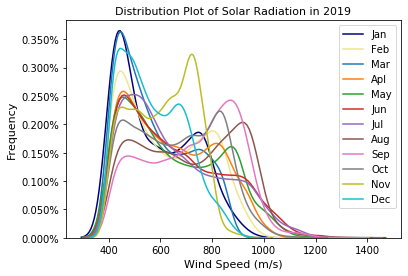

In [6]:
sns.distplot(np.array(df.GHI_ThPyra1_Wm2_avg[(df['Month']==1)&(df.GHI_ThPyra1_Wm2_avg>400)]),color='navy',label='Jan',bins=50, hist=False)
sns.distplot(np.array(df.GHI_ThPyra1_Wm2_avg[(df['Month']==2)&(df.GHI_ThPyra1_Wm2_avg>400)]),color='khaki',label='Feb',bins=50, hist=False)
sns.distplot(np.array(df.GHI_ThPyra1_Wm2_avg[(df['Month']==3)&(df.GHI_ThPyra1_Wm2_avg>400)]),label='Mar',bins=50, hist=False)
sns.distplot(np.array(df.GHI_ThPyra1_Wm2_avg[(df['Month']==4)&(df.GHI_ThPyra1_Wm2_avg>400)]),label='Apl',bins=50, hist=False)
sns.distplot(np.array(df.GHI_ThPyra1_Wm2_avg[(df['Month']==5)&(df.GHI_ThPyra1_Wm2_avg>400)]),label='May',bins=50, hist=False)
sns.distplot(np.array(df.GHI_ThPyra1_Wm2_avg[(df['Month']==6)&(df.GHI_ThPyra1_Wm2_avg>400)]),label='Jun',bins=50, hist=False)
sns.distplot(np.array(df.GHI_ThPyra1_Wm2_avg[(df['Month']==7)&(df.GHI_ThPyra1_Wm2_avg>400)]),label='Jul',bins=50, hist=False)
sns.distplot(np.array(df.GHI_ThPyra1_Wm2_avg[(df['Month']==8)&(df.GHI_ThPyra1_Wm2_avg>400)]),label='Aug',bins=50, hist=False)
sns.distplot(np.array(df.GHI_ThPyra1_Wm2_avg[(df['Month']==9)&(df.GHI_ThPyra1_Wm2_avg>400)]),label='Sep',bins=50, hist=False)
sns.distplot(np.array(df.GHI_ThPyra1_Wm2_avg[(df['Month']==10)&(df.GHI_ThPyra1_Wm2_avg>400)]),label='Oct',bins=50, hist=False)
sns.distplot(np.array(df.GHI_ThPyra1_Wm2_avg[(df['Month']==11)&(df.GHI_ThPyra1_Wm2_avg>400)]),label='Nov',bins=50, hist=False)
sns.distplot(np.array(df.GHI_ThPyra1_Wm2_avg[(df['Month']==12)&(df.GHI_ThPyra1_Wm2_avg>400)]),label='Dec',bins=50, hist=False)
#fig, ax = plt.subplots()
#ax.hist(amp_plot,bins=50,edgecolor='black')
#plt.axvline(x=940, color='red',linewidth=2,label='SLR: 940 A')
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Wind Speed (m/s)',fontsize=11)
plt.ylabel('Frequency',fontsize=11)
#plt.legend()
plt.title('Distribution Plot of Solar Radiation in 2019',fontsize=11)
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
#plt.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(amp_plot)))
plt.show()

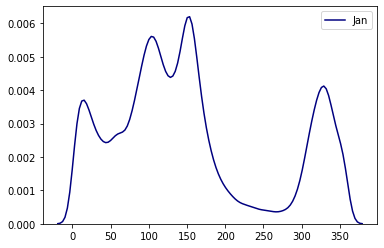

In [7]:
sns.distplot(np.array(df.WindDir_Wvane1_deg_avg360),color='navy',label='Jan',bins=100, hist=False)

In [7]:
Ts = 100 # maximum allowable Temp
def Re(Ta,Wv):
    #Ta = 25 # ambient temp
    Ts = 100 # maximum allowable Temp
    Tf = (Ts+Ta)/2 # temp of boundary layer
    Do = 0.0309 # Conductor diameter
    He = 10 # elevation
    p = (1.293-1.525*10**(-4)*He + 6.379*10**(-9)*He**2)/(1+0.00367*Tf) # air density
    u = (1.458*10**(-6)*(Tf+273)**1.5)/(Tf+383.4) # dynamic viscosity of air
    # Wv = # wind velocity
    return Do*p*Wv/u

In [8]:
def Qc(Ta,Wd,Wv):
    #Ta = 25 # ambient temp
    Ts = 100 # maximum allowable Temp
    Tf = (Ts+Ta)/2 # temp of boundary layer
    Do = 0.0309 # Conductor diameter
    He = 10 # elevation
    p = (1.293-1.525*10**(-4)*He + 6.379*10**(-9)*He**2)/(1+0.00367*Tf) # air density
    u = (1.458*(10**(-6))*((Tf+273)**1.5))/(Tf+383.4) # dynamic viscosity of air
    # Wv = # wind velocity
    
    #Wd = 90 # angle of wind direction and conductor axis
    kf = 2.424*10**(-2)+7.477*10**(-5)*Tf - 4.407*10**(-9)*Tf**2 # thermal conductivity of air
    K = 1.194-cosd(Wd)+0.194*cosd(2*Wd)+0.368*sind(2*Wd) #wind direction factor
    q1= K*(1.01+1.35*(Re(Ta,Wv)**0.52))*kf*(Ts-Ta) #1.35 w/m correct at low wind speeds
    q2= K*0.754*(Re(Ta,Wv)**0.6)*kf*(Ts-Ta)  #0.754 w/m correct at high wind speeds
    # Choose the larger of (q1,q2)
    q3 = 3.645*(p**0.5)*(Do**0.75)*((Ts-Ta)**1.25) # 3.645 at low Wv use the larger of forced and natural
    
    if Wv <= 0.2:
        return max(q1,q2,q3)
    else:
        return max(q1,q2)

In [9]:
def Qr(Ta):
    Do=0.0309
    Ts=100
    e = 0.7# emissivity
    return 17.8*Do*e*(1/10**8)*((Ts+273)**4-(Ta+273)**4)

In [10]:
a = 0.9 # absorbsibility
Do = 0.0309 # Conductor diameter
def Qs(qs):
    return a*Do*qs

In [11]:
def R(Ta): 
    R_low = 0.0983/1609.344
    R_high = 0.117/1609.344
    T_low = 25
    T_high = 75
    Ts =100
    Tf =0.5*(Ts+Ta)
    return R_low + (R_high-R_low)*(Tf-T_low)/(T_high-T_low)+R_low

In [12]:
def I_CI(Ta,qs,Wv,Wd):
    return math.sqrt((Qc_CI(Ta,Wv,Wd)+Qr(Ta)-Qs(qs))/R(Ta))

In [13]:
def I_3E(Ta,qs,Wv,Wd):
    return math.sqrt((Qc(Ta,Wd,Wv)+Qr(Ta)-Qs(qs))/R(Ta))

In [14]:
m = 6
n =7
time = np.array(df.LocalTime[(df.Month.isin([m]))&(df.Day.isin([21]))&(df.Hour>=10)&(df.Hour<=13)&(df.LocalTime>='2019-06-21 10:30:00')&(df.LocalTime<='2019-06-21 12:30:00')])
Ta = np.array(df.Temp_ThHyg1_degC_avg[(df.Month.isin([m]))&(df.Day.isin([21]))&(df.Hour>=10)&(df.Hour<=13)&(df.LocalTime>='2019-06-21 10:30:00')&(df.LocalTime<='2019-06-21 12:30:00')]) #ambientTemp
Wv = np.array(df.WindSpeed_Anemo1_ms_avg[(df.Month.isin([m]))&(df.Day.isin([21]))&(df.Hour>=10)&(df.Hour<=13)&(df.LocalTime>='2019-06-21 10:30:00')&(df.LocalTime<='2019-06-21 12:30:00')]) #windVelocity #[(df.Month.isin([m]))&(df['Day']<32)]
#Wd_northbase = np.array(df.WindDir_Wvane1_deg_avg360) #windDirection
qs = np.array(df.GHI_ThPyra1_Wm2_avg[(df.Month.isin([m]))&(df.Day.isin([21]))&(df.Hour>=10)&(df.Hour<=13)&(df.LocalTime>='2019-06-21 10:30:00')&(df.LocalTime<='2019-06-21 12:30:00')]) #solarIrradiance
df['WindDirection']= df.WindDir_Wvane1_deg_avg360.apply(lambda x: abs(205.46-x) 
                           if abs(205.46-x) <= 90 
                           else (abs(180-abs(205.46-x)) if abs(205.46-x) > 90 else 0))
Wd=np.array(df.WindDirection[(df.Month.isin([m]))&(df['Day']<32)])
Wd_or=np.array(df.WindDir_Wvane1_deg_avg360[(df.Month.isin([m]))&(df.Day.isin([21]))&(df.Hour>=10)&(df.Hour<=13)&(df.LocalTime>='2019-06-21 10:30:00')&(df.LocalTime<='2019-06-21 12:30:00')])

In [15]:
amp_plot =np.array([I_3E(Ta[i], qs[i], Wv[i], Wd[i]) for i in range(len(Ta))])

In [16]:
T = np.array(df.Temp_ThHyg1_degC_avg[(df.Month.isin([m]))&(df.Day.isin([21]))&(df.LocalTime=='2019-06-21 12:00:00')])
q = np.array(df.GHI_ThPyra1_Wm2_avg[(df.Month.isin([m]))&(df.Day.isin([21]))&(df.LocalTime=='2019-06-21 12:00:00')])
v = np.array(df.WindSpeed_Anemo1_ms_avg[(df.Month.isin([m]))&(df.Day.isin([21]))&(df.LocalTime=='2019-06-21 12:00:00')])
D = np.array(df.WindDir_Wvane1_deg_avg360[(df.Month.isin([m]))&(df.Day.isin([21]))&(df.LocalTime=='2019-06-21 12:00:00')])

In [32]:
print(T,qs,Wv,Wd_test)

NameError: name 'Wd_test' is not defined

In [18]:
#for (i, val) in enumerate(np.array(df.LocalTime[(df.Month.isin([m]))&(df['Day']<32)&(df.WindDir_Wvane1_deg_avg360[(df.Month.isin([m]))&(df['Day'].isin([21]))]<=180)&(df.WindDir_Wvane1_deg_avg360[(df.Month.isin([m]))&(df['Day']<32)]>=90)])):
    #print(i, val)

In [17]:
def wind_1(x):
    if abs(205.46-x) <= 90:
        return abs(205.46-x)
    elif abs(205.46-x) > 90:
        return (abs(180-abs(205.46-x)))
    else:
        return 0   

In [18]:
def wind_2(x):
    if abs(270-x) <= 90:
        return abs(270-x)
    elif abs(270-x) > 90:
        return (abs(180-abs(270-x)))
    else:
        return 0    
def wind_3(x):
    if abs(154.12-x) <= 90:
        return abs(154.12-x)
    elif abs(154.12-x) > 90:
        return (abs(180-abs(154.12-x)))
    else:
        return 0    
def wind_4(x):
    if abs(99.98-x) <= 90:
        return abs(99.98-x)
    elif abs(99.88-x) > 90:
        return (abs(180-abs(99.98-x)))
    else:
        return 0      
def wind_5(x):
    if abs(178.61-x) <= 90:
        return abs(178.61-x)
    elif abs(178.61-x) > 90:
        return (abs(180-abs(178.61-x)))
    else:
        return 0
def wind_6(x):
    if abs(244.96-x) <= 90:
        return abs(244.96-x)
    elif abs(244.96-x) > 90:
        return (abs(180-abs(244.96-x)))
    else:
        return 0 

In [19]:
Wd_1=np.array(df.WindDir_Wvane1_deg_avg360[(df.Month.isin([m]))&(df.Day.isin([21]))&(df.Hour>=10)&(df.Hour<=13)&(df.LocalTime>='2019-06-21 10:30:00')&(df.LocalTime<='2019-06-21 12:30:00')].apply(wind_1))
Wd_4=np.array(df.WindDir_Wvane1_deg_avg360[(df.Month.isin([m]))&(df.Day.isin([21]))&(df.Hour>=10)&(df.Hour<=13)&(df.LocalTime>='2019-06-21 10:30:00')&(df.LocalTime<='2019-06-21 12:30:00')].apply(wind_4))

In [20]:
Ts = 100 # maximum allowable Temp
def Re(Ta,Wv):
    #Ta = 25 # ambient temp
    Ts = 100 # maximum allowable Temp
    Tf = (Ts+Ta)/2 # temp of boundary layer
    Do = 0.0309 # Conductor diameter
    He = 10 # elevation
    p = (1.293-1.525*10**(-4)*He + 6.379*10**(-9)*He**2)/(1+0.00367*Tf) # air density
    u = (1.458*10**(-6)*(Tf+273)**1.5)/(Tf+383.4) # dynamic viscosity of air
    # Wv = # wind velocity
    return Do*p*Wv/u
def Qc(Ta,Wd,Wv):
    #Ta = 25 # ambient temp
    Ts = 100 # maximum allowable Temp
    Tf = (Ts+Ta)/2 # temp of boundary layer
    Do = 0.0309 # Conductor diameter
    He = 10 # elevation
    p = (1.293-1.525*10**(-4)*He + 6.379*10**(-9)*He**2)/(1+0.00367*Tf) # air density
    u = (1.458*(10**(-6))*((Tf+273)**1.5))/(Tf+383.4) # dynamic viscosity of air
    # Wv = # wind velocity
    
    #Wd = 90 # angle of wind direction and conductor axis
    kf = 2.424*10**(-2)+7.477*10**(-5)*Tf - 4.407*10**(-9)*Tf**2 # thermal conductivity of air
    K = 1.194-cosd(Wd)+0.194*cosd(2*Wd)+0.368*sind(2*Wd) #wind direction factor
    q1= K*(1.01+1.35*(Re(Ta,Wv)**0.52))*kf*(Ts-Ta) #1.35 w/m correct at low wind speeds
    q2= K*0.754*(Re(Ta,Wv)**0.6)*kf*(Ts-Ta)  #0.754 w/m correct at high wind speeds
    # Choose the larger of (q1,q2)
    q3 = 3.645*(p**0.5)*(Do**0.75)*((Ts-Ta)**1.25) # 3.645 at low Wv use the larger of forced and natural
    
    if Wv <= 0.2:
        return max(q1,q2,q3)
    else:
        return max(q1,q2)
def Qr(Ta):
    Do=0.0309
    Ts=100
    e = 0.7# emissivity
    return 17.8*Do*e*(1/10**8)*((Ts+273)**4-(Ta+273)**4)
a = 0.9 # absorbsibility
Do = 0.0309 # Conductor diameter
def Qs(qs):
    return a*Do*qs

In [21]:
def I_3E(Ta,qs,Wv,Wd):
    return math.sqrt((Qc(Ta,Wd,Wv)+Qr(Ta)-Qs(qs))/R(Ta))
#Time = np.array(df.LocalTime[(df['Month']==m)&(df['Day']<15)])

In [22]:
median = np.median(data)
upper_quartile = np.percentile(data, 75)
lower_quartile = np.percentile(data, 25)

NameError: name 'data' is not defined

In [348]:
print(wind_8,wind_6,wind_1)

[3.19304 3.01029 3.65821 ... 1.39284 2.06221 2.3715 ] [2.79592 2.92663 2.31862 ... 2.52463 3.04708 2.41204] [3.80383 2.61458 1.90708 ... 2.79922 2.15438 2.27063]


In [27]:
temp_8 = np.array((df.Temp_ThHyg1_degC_avg[(df.Month==8)])[np.logical_not(np.isnan(df.Temp_ThHyg1_degC_avg[(df.Month==8)]))]) 
wind_8 = np.array((df.WindSpeed_Anemo1_ms_avg[(df.Month==8)])[np.logical_not(np.isnan(df.WindSpeed_Anemo1_ms_avg[(df.Month==8)]))]) 
print(np.median(temp_8),np.median(wind_8),np.percentile(temp_8, 75),np.percentile(temp_8, 25),np.percentile(wind_8, 75),np.percentile(wind_8, 25))

29.1367 1.95563 31.4184 27.0906 2.8366 1.223265


In [26]:
df['temp_8']=(df.Temp_ThHyg1_degC_avg[(df.Month==8)])[np.logical_not(np.isnan(df.Temp_ThHyg1_degC_avg[(df.Month==8)]))]
df['wind_8']=(df.WindSpeed_Anemo1_ms_avg[(df.Month==8)])[np.logical_not(np.isnan(df.WindSpeed_Anemo1_ms_avg[(df.Month==8)]))]

In [ ]:
sns.boxplot(x='temp_8')

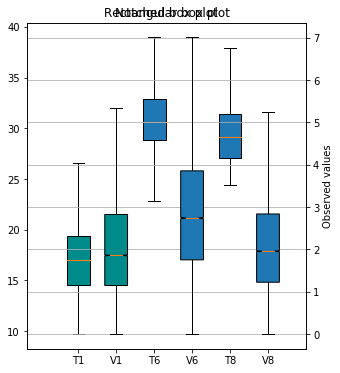

In [494]:

fig, ax = plt.subplots(figsize=(5,6))
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = ax.boxplot(data1,positions=[1,2,3],labels=['T1','T6','T8'],showfliers=False,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     )  # will be used to label x-ticks
ax.set_title('Rectangular box plot')

# notch shape box plot
ax2=ax.twinx()
bplot2 = ax2.boxplot(data2,positions=[1.5,2.5,3.5],labels=['V1','V6','V8'],showfliers=False,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     )  # will be used to label x-ticks
ax2.set_title('Notched box plot')

# fill with colors
colors = ['darkcyan']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()

Text(0.5, 1.0, 'Boxplot of Main Parameters in 2019')

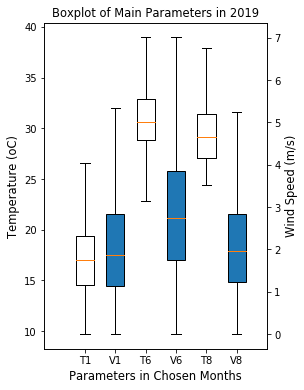

In [32]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(4,6))
#white = mpatches.Patch(color='white', label='Temperature')
#blue =mpatches.Patch(color='blue', label='Wind Speed')
#first_legend=plt.legend(handles=[white,blue],loc="upper left")
#ax = plt.gca().add_artist(first_legend)
data = [temp_1,temp_6,temp_8,wind_1,wind_6,wind_8]
data1 = [temp_1,temp_6,temp_8]
data2=[wind_1,wind_6,wind_8]
#ax.yaxis.grid(True)
bplot1=ax.boxplot(data1,positions=[1,2,3],showfliers=False)
#ax.set_yticks(range(10,40,10))
#ax.set_yticklabels(range(10,40,10))
ax.set_xlabel("Parameters in Chosen Months",fontsize=11.5)
ax.set_ylabel("Temperature (oC)",fontsize=11.5)
ax.set_xticklabels(['T1','T6','T8'])
#ax.set_xticks([1,2,3],['Jan_T','Jan_V','June_T'])
ax2=ax.twinx()
bplot2=ax2.boxplot(data2,positions=[1.5,2.5,3.5],patch_artist=True,labels=['V1','V6','V8'],showfliers=False)
ax2.set_ylabel("Wind Speed (m/s)",fontsize=11.5)
#ax2.set_yticks(range(1,8,1))
#ax2.set_yticklabels(range(1,8,1))
#ax2.set_xticklabels(['V1','V6','V8'])
ax2.set_title('Boxplot of Main Parameters in 2019',fontsize=11.5)



In [23]:
temp_6 = np.array((df.Temp_ThHyg1_degC_avg[(df.Month==6)])[np.logical_not(np.isnan(df.Temp_ThHyg1_degC_avg[(df.Month==6)]))]) 
wind_6 = np.array((df.WindSpeed_Anemo1_ms_avg[(df.Month==6)])[np.logical_not(np.isnan(df.WindSpeed_Anemo1_ms_avg[(df.Month==6)]))]) 
print(np.median(temp_6),np.median(wind_6),np.percentile(temp_6, 75),np.percentile(temp_6, 25),np.percentile(wind_6, 75),np.percentile(wind_6, 25))

30.5681 2.74 32.89935 28.864 3.85581 1.7520449999999999


In [24]:
temp_1 = np.array((df.Temp_ThHyg1_degC_avg[(df.Month==1)])[np.logical_not(np.isnan(df.Temp_ThHyg1_degC_avg[(df.Month==1)]))]) 
wind_1 = np.array((df.WindSpeed_Anemo1_ms_avg[(df.Month==1)])[np.logical_not(np.isnan(df.WindSpeed_Anemo1_ms_avg[(df.Month==1)]))]) 
print(np.median(temp_1),np.median(wind_1),np.percentile(temp_1, 75),np.percentile(temp_1, 25),np.percentile(wind_1, 75),np.percentile(wind_1, 25))

16.9724 1.8580400000000001 19.37275 14.5498 2.82476 1.1453975


In [33]:
temp = [temp_1,temp_6,temp_8]
print(temp)
wind = [wind_1,wind_6,wind_8]
print(wind)

[array([10.6836, 10.6731, 10.6719, ..., 21.1705, 21.1529, 21.1461]), array([25.1652, 25.1591, 25.1532, ..., 29.6612, 29.6334, 29.6127]), array([29.1225, 29.113 , 29.0963, ..., 26.5393, 26.5424, 26.5201])]
[array([3.80383, 2.61458, 1.90708, ..., 2.79922, 2.15438, 2.27063]), array([2.79592, 2.92663, 2.31862, ..., 2.52463, 3.04708, 2.41204]), array([3.19304, 3.01029, 3.65821, ..., 1.39284, 2.06221, 2.3715 ])]


In [367]:
#plt.boxplot(temp_1,temp_6)#,vert=True,showfliers=False)

In [34]:
Line_Dir = np.array([43.86,71.6,7.48,61.62,17.01,83.36])
Line_Amp = np.array([1255.00,1320.27,965.57,1304.56,1069.41,1340.64])
Line_Name = np.array(['(1)','(2)','(3)','(4)','(5)','(6)'])

In [35]:
Line_Name = ['(1)','(2)','(3)','(4)','(5)','(6)']
Line_Dir1=[49.04,66.43,2.31,56.45,22.19,88.54]
Line_Amp1=[1047.97,1077.94,762.17,1063.65,926.95,1109.76]
Line_Dir6=[76.59,12.05,52.07,2.07,76.56,37.09]
Line_Amp6=[1265.79,980.80,1224.42,872.82,1265.74,1168.84]
Line_Dir8=[47.51,67.95,3.829,57.97,20.66,87.01]
Line_Amp8=[1236.99,1276.27,947.39,1261.41,1097.84,1305.78]

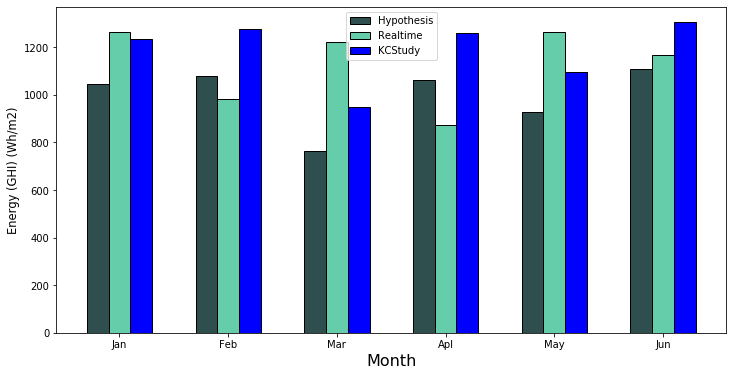

In [36]:
fig=plt.figure(figsize=(12,6))
method = ['Jan','Feb','Mar','Apl','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
bar_width = 0.2
t1 = np.arange(len(Line_Amp6))
t2 = [x + bar_width for x in t1]
t3 = [x + bar_width for x in t2]
plt.bar(t1,Line_Amp1, color='darkslategrey', width=bar_width, edgecolor='black', label='Hypothesis')
plt.bar(t2,Line_Amp6, color='mediumaquamarine', width=bar_width, edgecolor='black', label='Realtime')
plt.bar(t3,Line_Amp8, color='blue', width=bar_width, edgecolor='black', label='KCStudy')
plt.xticks([r+bar_width for r in range(len(Line_Amp6))],method)
plt.xlabel('Month',fontsize = 16)
plt.ylabel('Energy (GHI) (Wh/m2)',fontsize = 11.5)
#plt.title('Comparision of Energy between methods in a Week of each Month')
plt.legend()
plt.show()

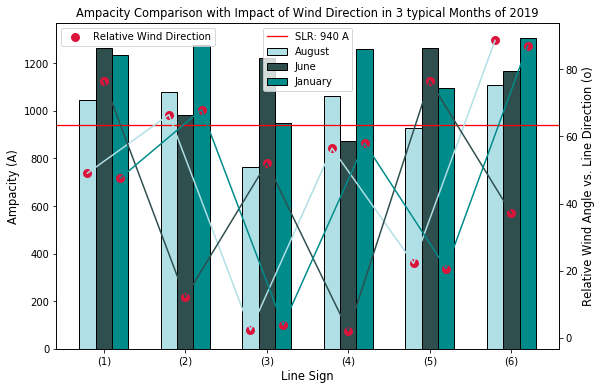

In [42]:
fig,ax = plt.subplots(figsize=(9,6))
# make a plot
ax.axhline(y=940,color='red',linewidth=1.3,label='SLR: 940 A')
ax.legend(loc='best',fontsize=9.5)
#ax.plot(time,Wd_or, linewidth=2,label='Wd')
#ax.plot(time,amp_plot_1, linewidth=1.5,label='First Line',color='orange')
#ax.bar(Line_Name,Line_Amp)
bar_width = 0.2
t1 = np.arange(len(Line_Amp6))
t2 = [x + bar_width for x in t1]
t3 = [x + bar_width for x in t2]
ax.bar(t1,Line_Amp1, color='powderblue', width=bar_width, edgecolor='black', label='August')
ax.bar(t2,Line_Amp6, color='darkslategrey', width=bar_width, edgecolor='black', label='June')
ax.bar(t3,Line_Amp8, color='darkcyan', width=bar_width, edgecolor='black', label='January')
ax.legend(loc='best',fontsize=10)
ax.set_xticks(t2)
ax.set_xticklabels(Line_Name)
ax.set_xlabel('Line Sign',fontsize = 11.5)
ax.set_ylabel('Ampacity (A)',fontsize = 11.5)
#plt.show()

#ax.set_ylabel("Ampacity (A) & Solar Irradiance (W/m2)",fontsize=13)
#plt.legend(loc='upper right',fontsize=12)
#x = np.linspace(0,11,100)
# twin object for two different y-axis on the sample plot
#plt.axhline(y=940, color='red',linewidth=2,label='SLR: 940 A')
#plt.legend(loc='upper left',fontsize=10)
ax2=ax.twinx()
ax2.plot(t1,Line_Dir1, markeredgewidth=2,markeredgecolor='black',linewidth=1.5,color='powderblue')
ax2.plot(t2,Line_Dir6, markeredgewidth=2,markeredgecolor='black',linewidth=1.5,color='darkslategrey')
ax2.plot(t3,Line_Dir8, markeredgewidth=2,markeredgecolor='black',linewidth=1.5,color='darkcyan')
ax2.scatter(t1,Line_Dir1, linewidth=3,label='Relative Wind Direction',color='crimson')
ax2.scatter(t2,Line_Dir6, linewidth=3,color='crimson')
ax2.scatter(t3,Line_Dir8, linewidth=3,color='crimson')
ax2.set_ylabel('Relative Wind Angle vs. Line Direction (o)',fontsize = 11.5)
ax2.legend(loc='upper left',fontsize=10)
plt.title('Ampacity Comparison with Impact of Wind Direction in 3 typical Months of 2019',fontsize=11.5)
#plt.legend(loc='upper right',fontsize=10)

plt.show()

In [279]:
print(np.array(df.LocalTime[(df.Month==1)&(df.Temp_ThHyg1_degC_avg>=16.97)&(df.Temp_ThHyg1_degC_avg<=19.37)&(df.WindDir_Wvane1_deg_avg360>=130)&(df.WindDir_Wvane1_deg_avg360<=160)&(df.WindSpeed_Anemo1_ms_avg>=1.4)&(df.WindSpeed_Anemo1_ms_avg<=1.86)&(df.GHI_ThPyra1_Wm2_avg>=400)]))

['2019-01-06T12:36:00.000000000' '2019-01-06T12:43:00.000000000'
 '2019-01-06T12:44:00.000000000' '2019-01-23T13:24:00.000000000']


In [331]:
t = '2019-01-06T12:44:00'
T = np.array(df.Temp_ThHyg1_degC_avg[(df.LocalTime==t)])
q = np.array(df.GHI_ThPyra1_Wm2_avg[(df.LocalTime==t)])
v = np.array(df.WindSpeed_Anemo1_ms_avg[(df.LocalTime==t)])
D = np.array(df.WindDir_Wvane1_deg_avg360[(df.LocalTime==t)])
print(T[0],q[0],v[0],D[0])

19.2962 476.215 1.53049 157.94899999999998


In [332]:
D1 = np.array(df.WindDir_Wvane1_deg_avg360[(df.LocalTime==t)].apply(wind_1))
D2 = np.array(df.WindDir_Wvane1_deg_avg360[(df.LocalTime==t)].apply(wind_2))
D3 = np.array(df.WindDir_Wvane1_deg_avg360[(df.LocalTime==t)].apply(wind_3))
D4 = np.array(df.WindDir_Wvane1_deg_avg360[(df.LocalTime==t)].apply(wind_4))
D5 = np.array(df.WindDir_Wvane1_deg_avg360[(df.LocalTime==t)].apply(wind_5))
D6 = np.array(df.WindDir_Wvane1_deg_avg360[(df.LocalTime==t)].apply(wind_6))
print(D1,D2,D3,D4,D5,D6)

[47.511] [67.949] [3.829] [57.969] [20.661] [87.011]


In [333]:
print(I_3E(T[0], q[0], v[0], D1[0]),
I_3E(T[0], q[0], v[0], D2[0]),
I_3E(T[0], q[0], v[0], D3[0]),
I_3E(T[0], q[0], v[0], D4[0]),
I_3E(T[0], q[0], v[0], D5[0]),
I_3E(T[0], q[0], v[0], D6[0]))

1236.985459820654 1276.2672879472304 947.3947784726859 1261.410769603919 1097.839036075495 1305.7806415326659


In [30]:
[43.86] [71.6] [7.48] [61.62] [17.01] [83.36]
1255.0026188209126 1320.2733457211232 965.5724197676913 1304.56396820173 1069.4109417782722 1340.6353399829925

SyntaxError: invalid syntax (<ipython-input-30-d6c06976b16a>, line 2)

In [69]:
*TYPE1: [56.524] [58.936] [5.184] [48.956] [29.674] [83.976]
1231.0320444152428 1235.2449838744685 946.0019130459043 1214.1496651217285 1135.180947106377 1270.2103739201098

*TYPE2: 29.2174 296.573 2.89512 104.098 [78.638] [14.098] [50.022] [4.118] [74.512] [39.138]
1432.7087533465865 1149.896098597629 1379.4835887964175 1041.1048779717903 1426.064412341579 1336.9299481204737
    
    

TypeError: can't multiply sequence by non-int of type 'float'

In [32]:
Line_Dir = np.array([43.86,71.6,7.48,61.62,17.01,83.36])
Line_Amp = np.array([1255.00,1320.27,965.57,1304.56,1069.41,1340.64])
Line_Name = np.array(['(1)','(2)','(3)','(4)','(5)','(6)'])

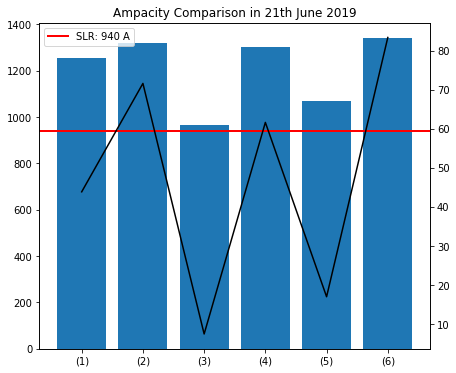

In [33]:
fig,ax = plt.subplots(figsize=(10,6))
# make a plot
#ax.plot(time,Wd_or, linewidth=2,label='Wd')
#ax.plot(time,amp_plot_1, linewidth=1.5,label='First Line',color='orange')
ax.bar(Line_Name,Line_Amp)
#ax.set_ylabel("Ampacity (A) & Solar Irradiance (W/m2)",fontsize=13)
#plt.legend(loc='upper left',fontsize=12)
#x = np.linspace(0,11,100)
# twin object for two different y-axis on the sample plot
plt.axhline(y=940, color='red',linewidth=2,label='SLR: 940 A')
plt.legend(loc='upper left',fontsize=10)
ax2=ax.twinx()
ax2.plot(Line_Name,Line_Dir, linewidth=1.5,label='RelativeWindDirection',color='black')
plt.title('Ampacity Comparison in 21th June 2019',fontsize=12)
#plt.legend(loc='upper right',fontsize=12)
plt.show()

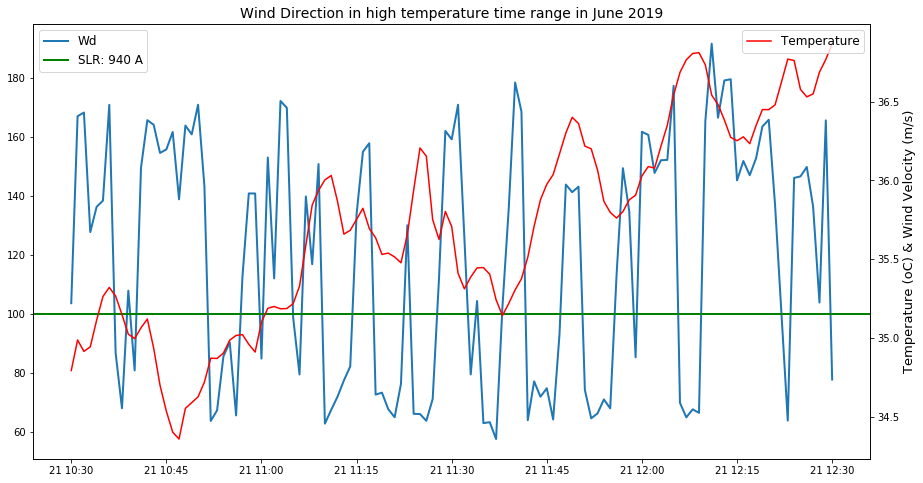

In [34]:
fig,ax = plt.subplots(figsize=(15,8))
# make a plot
ax.plot(time,Wd_or, linewidth=2,label='Wd')
#ax.plot(time_mp,qs_mp, linewidth=1.5,label='Solar Irradiance',color='orange')
# set x-axis label
#ax.set_xlabel("Time",fontsize=13)
# set y-axis label
#ax.set_ylabel("Ampacity (A) & Solar Irradiance (W/m2)",fontsize=13)
plt.legend(loc='upper left',fontsize=12)
#x = np.linspace(0,11,100)
# twin object for two different y-axis on the sample plot
plt.axhline(y=100, color='green',linewidth=2,label='SLR: 940 A')
plt.legend(loc='upper left',fontsize=12)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(time,Ta,linewidth=1.5,color='red',label='Temperature')
#ax2.plot(time_mp,Wve_mp,linewidth=1.5,color='black',label='Effective Wind Speed')
#ax2.plot(time_mp,Wv_mp,linewidth=1.5,color='green',label='Wind Speed')
#ax2.plot(time_mp,Wd_mp,linewidth=1.5,color='green',label='wind relative angle')
ax2.set_ylabel("Temperature (oC) & Wind Velocity (m/s)",fontsize=13)
plt.title('Wind Direction in high temperature time range in June 2019',fontsize=14)
plt.legend(loc='upper right',fontsize=12)
plt.show()